# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [2]:
geo_data1 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [3]:
geo_data2 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [4]:
geo_data3 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Узнаем, содержатся ли пропущенные значения в датасетах

In [5]:
geo_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропущенных данных нет, категориальных признаков не наблюдается (следовательно ничего кодировать не нужно)

Узнаем как выглядят распределения данных для датасета geo_data1

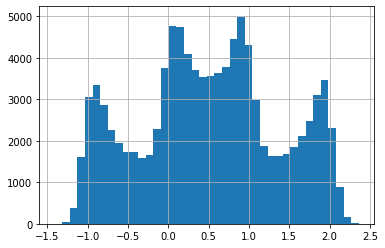

In [8]:
geo_data1['f0'].hist(bins=40)

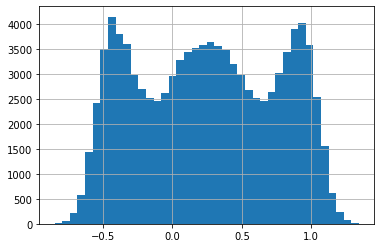

In [9]:
geo_data1['f1'].hist(bins=40)

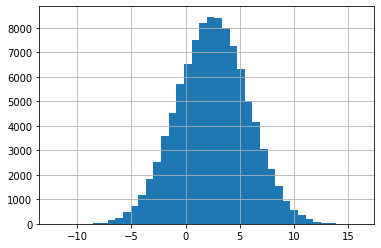

In [10]:
geo_data1['f2'].hist(bins=40)

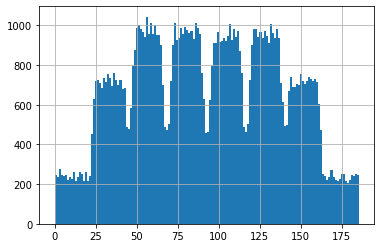

In [11]:
geo_data1['product'].hist(bins=150)

Три из четырех признаков распределены ненормального

Узнаем как выглядят распределения данных для датасета geo_data2

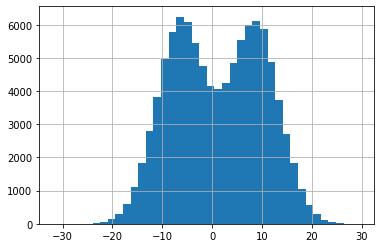

In [12]:
geo_data2['f0'].hist(bins=40)

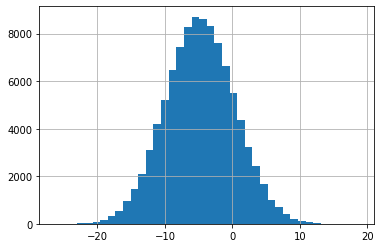

In [13]:
geo_data2['f1'].hist(bins=40)

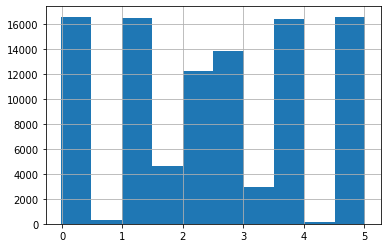

In [14]:
geo_data2['f2'].hist()

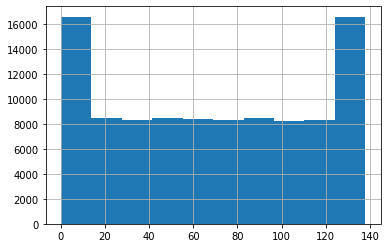

In [15]:
geo_data2['product'].hist()

Снова большинство распределений являются ненормальными

Посмотрим на распределения признаков в датасете geo_data3

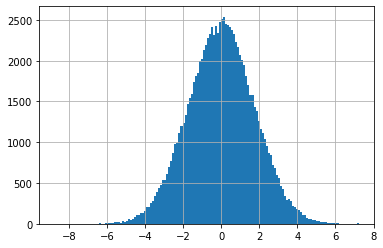

In [16]:
geo_data3['f0'].hist(bins=150)

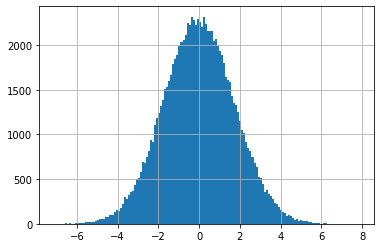

In [17]:
geo_data3['f1'].hist(bins=150)

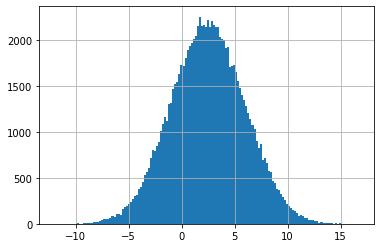

In [18]:
geo_data3['f2'].hist(bins=150)

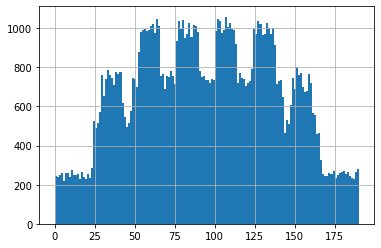

In [19]:
geo_data3['product'].hist(bins=150)

Большинство распределений в датафреймах geo_data1 и geo_data2 представлены ненормальными распределениями. Посчитаем коэффициент корреляции методом Спирмена

In [20]:
geo_data1.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


In [21]:
geo_data2.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,0.182248,-0.002000,-0.122869
f1,0.182248,1.000000,-0.003678,-0.033908
f2,-0.002000,-0.003678,1.000000,0.975605
product,-0.122869,-0.033908,0.975605,1.000000


Заметим сильную заимосвязь признака f2 и целевого признака product (0.97)

В geo_data3 большинство распределений являются нормальными, поэтому подсчитаем коэффициент корреляции методом Пирсона

In [22]:
geo_data3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


При обучении моделей признак "id" может запутать алгоритмы, т.к он не оказывает никакого влияния на результаты предиктов. Выделим целевой и обычные признаки при этом откинув параметр "id"

In [23]:
geo_data1 = geo_data1.drop('id', axis=1)
geo_data1

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [24]:
feature1 = geo_data1.drop('product', axis=1)
target1 = geo_data1['product']

In [25]:
geo_data2 = geo_data2.drop('id', axis=1)
geo_data2

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


In [26]:
feature2 = geo_data2.drop('product', axis=1)
target2 = geo_data2['product']

In [27]:
geo_data3 = geo_data3.drop('id', axis=1)
geo_data3

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


In [28]:
feature3 = geo_data3.drop('product', axis=1)
target3 = geo_data3['product']

In [29]:
column = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(feature1[column])
feature1[column] = scaler.transform(feature1[column])
feature1 

,f0,f1,f2
0,0.235512,-1.482793,-0.394515
1,0.956946,-1.170246,0.573368
2,0.599101,-0.194581,-0.333326
3,-0.610890,-0.220269,0.146516
4,1.706773,-0.187797,0.692414
...,...,...,...
99995,0.540861,0.239498,1.099890
99996,1.023149,-1.254384,-0.378278
99997,0.606961,-0.458648,-1.185554
99998,0.570920,-1.543771,-0.282855


In [30]:
scaler.fit(feature2[column])
feature2[column] = scaler.transform(feature2[column])
feature2

,f0,f1,f2
0,-1.800451,-0.679595,-1.467757
1,1.464528,0.258112,-0.877783
2,0.571264,-0.224969,1.471398
3,-1.586290,-1.310484,1.470373
4,1.289432,-0.654483,1.473278
...,...,...,...
99995,0.936253,-0.406567,-0.291298
99996,-1.260548,-1.515967,1.473993
99997,-0.950289,0.334478,1.469925
99998,-0.053044,-0.264854,-0.877217


In [31]:
scaler.fit(feature3[column])
feature3[column] = scaler.transform(feature3[column])
feature3

,f0,f1,f2
0,-0.663387,0.557908,-0.957007
1,0.150548,0.157142,-1.446788
2,0.111178,0.168235,-2.326682
3,1.289833,-0.318815,-0.450590
4,-0.299079,0.993029,0.979978
...,...,...,...
99995,-1.027149,0.651465,1.084879
99996,-0.729514,-0.515917,0.008469
99997,-0.693956,-1.708011,0.784321
99998,-1.398307,1.398110,-2.315745


# 2. Обучение и проверка модели

Разобьем три датасета на обучающие и валидационные выборки в соотношении 3:1

In [32]:
feature_train1, feature_valid1, target_train1, target_valid1 = train_test_split(feature1, target1,
                                                                                 test_size=0.25, random_state=12345)
print(feature_train1.shape, target_train1.shape)
print(feature_valid1.shape, target_valid1.shape)

(75000, 3) (75000,)
(25000, 3) (25000,)


In [33]:
feature_train2, feature_valid2, target_train2, target_valid2 = train_test_split(feature2, target2,
                                                                                 test_size=0.25, random_state=12345)
print(feature_train2.shape, target_train2.shape)
print(feature_valid2.shape, target_valid2.shape)

(75000, 3) (75000,)
(25000, 3) (25000,)


In [34]:
feature_train3, feature_valid3, target_train3, target_valid3 = train_test_split(feature3, target3,
                                                                                 test_size=0.25, random_state=12345)
print(feature_train3.shape, target_train3.shape)
print(feature_valid3.shape, target_valid3.shape)

(75000, 3) (75000,)
(25000, 3) (25000,)


Обучим модель линейной регрессии для каждого региона и сохраним предикты

In [35]:
model = LinearRegression()
model.fit(feature_train1, target_train1)
predict1 = model.predict(feature_valid1)
print('Фактический средний запас сырья:', target_valid1.mean())
print('Предположительный средний запас сырья:', predict1.mean())
print('Коэффициент детерминации:', r2_score(target_valid1, predict1))
print('RMSE:', np.sqrt(mean_squared_error(target_valid1, predict1)))

Фактический средний запас сырья: 92.07859674082927
Предположительный средний запас сырья: 92.59256778438038
Коэффициент детерминации: 0.27994321524487786
RMSE: 37.5794217150813


In [36]:
model = LinearRegression()
model.fit(feature_train2, target_train2)
predict2 = model.predict(feature_valid2)
print('Фактический средний запас сырья:', target_valid2.mean())
print('Предположительный средний запас сырья:', predict2.mean())
print('Коэффициент детерминации:', r2_score(target_valid2, predict2))
print('RMSE:', np.sqrt(mean_squared_error(target_valid2, predict2)))

Фактический средний запас сырья: 68.72313602435997
Предположительный средний запас сырья: 68.72854689544602
Коэффициент детерминации: 0.9996233978805127
RMSE: 0.8930992867756161


In [37]:
model = LinearRegression()
model.fit(feature_train3, target_train3)
predict3 = model.predict(feature_valid3)
print('Фактический средний запас сырья:', target_valid3.mean())
print('Предположительный средний запас сырья:', predict3.mean())
print('Коэффициент детерминации:', r2_score(target_valid3, predict3))
print('RMSE:', np.sqrt(mean_squared_error(target_valid3, predict3)))

Фактический средний запас сырья: 94.88423280885438
Предположительный средний запас сырья: 94.96504596800489
Коэффициент детерминации: 0.20524758386040443
RMSE: 40.02970873393434


## Вывод

Обучили три модели линейной регрессии. Отметим, что вторая модель обучилась почти идеально (коэффициент детерминации равен 0.999). Возможно это из-за сильной корреляции между третьим (f2) и целевым признаком (product) у данных со второго региона.

Самый большой запас сырья находится в третьем регионе - 94.9 (против 92 в первом и 68.7 во втором)

# 3. Подготовка к расчёту прибыли

Подсчитаем сколько в среднем в каждом из топ-200 скважин должно быть сырья

In [38]:
BUDGET = 10000000
ONE_PRODUCT = 450
TOP_WELL = 200

In [39]:
BUDGET / ONE_PRODUCT / TOP_WELL

111.11111111111111

В средем 111 единиц продукта должно быть в скважине. Данные, представленные во втором пункте проекта показывают среднее для всех скважин, а не для топ-200

Узнаем для топ-200

In [40]:
target_valid3.sort_values(ascending=False)[:TOP_WELL].mean()

188.25181287990824

In [41]:
target_valid2.sort_values(ascending=False)[:TOP_WELL].mean()

137.9454077409057

In [42]:
target_valid1.sort_values(ascending=False)[:TOP_WELL].mean()

183.45497311465348

Как можем видеть, средние заметно выше, чем минимальное среднее для начала работ

# 4. Расчёт прибыли и рисков 

Напишем функцию, которая подсчитывает прибыль с региона

In [43]:
pd.Series(predict1).mean()

92.59256778438038

In [44]:
target_valid1.mean()

92.07859674082927

In [45]:
def revenue(predict, target):
    predict = pd.Series(predict).reset_index(drop=True)
    target = pd.Series(target).reset_index(drop=True)
    predict_sorted = predict.sort_values(ascending=False).index[:TOP_WELL]
    target_sorted = target[predict_sorted]
    return target_sorted.sum() * ONE_PRODUCT - BUDGET

revenue(predict2, target_valid2)

2415086.6966815125

Применим технику "Bootstrap" для нахождения среднего, 95-го доверительного интервала, а также рассчитаем риски

**Бутстрап для первого региона**

In [46]:
state = np.random.RandomState(12345)

In [47]:
predict1 = pd.Series(predict1)
predict1

0         95.894952
1         77.572583
2         77.892640
3         90.175134
4         70.510088
            ...    
24995    103.037104
24996     85.403255
24997     61.509833
24998    118.180397
24999    118.169392
Length: 25000, dtype: float64

In [48]:
values = []
for i in range(1000):
    target_valid1 = pd.Series(target_valid1).reset_index(drop=True)
    subsample = target_valid1.sample(n=500, replace=True, random_state=state)
    probs = predict1[subsample.index]
    values.append(revenue(probs, subsample))
pd.Series(values).mean()

396164.98480237107

Посмотрим на распределение

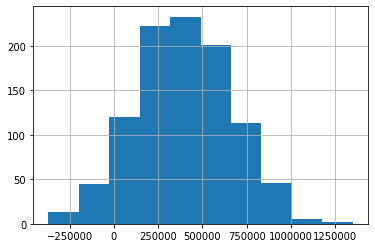

In [49]:
values = pd.Series(values)
values.hist()

In [50]:
low = values.quantile(0.025)
high = values.quantile(0.975)
print('95-й доверительный интервал - ({} ; {})'.format(low, high))

95-й доверительный интервал - (-111215.54589049605 ; 909766.941553422)


In [51]:
print((values[values < 0]).count() / len(values) * 100)

6.9


Как можем заметить, вероятность убытков не подходит по условию задачи, следовательно первый регион не подходит для разработки скважин

**Бутстрап для второго района**

In [52]:
values = []
for i in range(1000):
    target_valid2 = pd.Series(target_valid2).reset_index(drop=True)
    subsample = target_valid2.sample(n=500, replace=True, random_state=state)
    probs = predict2[subsample.index]
    values.append(revenue(probs, subsample))
pd.Series(values).mean()

461155.8172772397

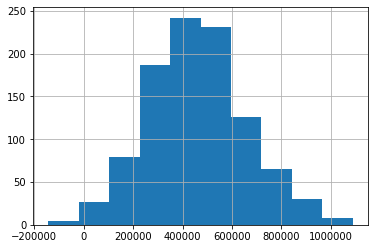

In [53]:
values = pd.Series(values)
values.hist()

In [54]:
low = values.quantile(0.025)
high = values.quantile(0.975)
print('95-й доверительный интервал - ({} ; {})'.format(low, high))

95-й доверительный интервал - (78050.81075174107 ; 862952.0602637231)


In [55]:
values[values < 0].count() / len(values) * 100

0.7000000000000001

Как можем видеть, вероятность убытков меньше одного процента, а доверительный интервал принимает только положительные значения.

**Бутстрап для третьего района**

In [56]:
values = []
for i in range(1000):
    target_valid3 = pd.Series(target_valid3).reset_index(drop=True)
    subsample = target_valid3.sample(n=500, replace=True, random_state=state)
    probs = predict3[subsample.index]
    values.append(revenue(probs, subsample))
pd.Series(values).mean()

392950.4751706045

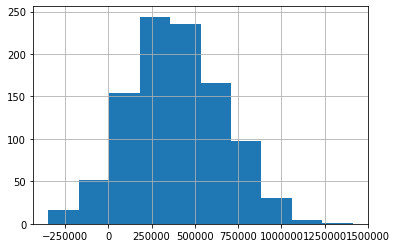

In [57]:
values = pd.Series(values)
values.hist()

In [58]:
low = values.quantile(0.025)
high = values.quantile(0.975)
print('95-й доверительный интервал - ({} ; {})'.format(low, high))

95-й доверительный интервал - (-112227.62537857569 ; 934562.914551164)


In [59]:
values[values < 0].count() / len(values) * 100

6.5

Получили, что третий регион не подходит для разработки скважин, вероятность убытков больше 2.5%, а 95-й доверительный интервал "захватывает" отрицательные значения

## Вывод

В результате получили, что самый перспективный район для исследований - второй. Вероятность убытков меньше процента, 95-й доверительный интервал "уже", чем в других двух районах, а среднее выше.

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован